https://mne.tools/dev/auto_examples/preprocessing/muscle_detection.html

Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
Raw data loaded. Number of channels: 127, Sampling frequency: 128.0 Hz
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected EEG channels: ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
Standard 10-20 montage applied.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 5 components
Fitting ICA took 1.7s.


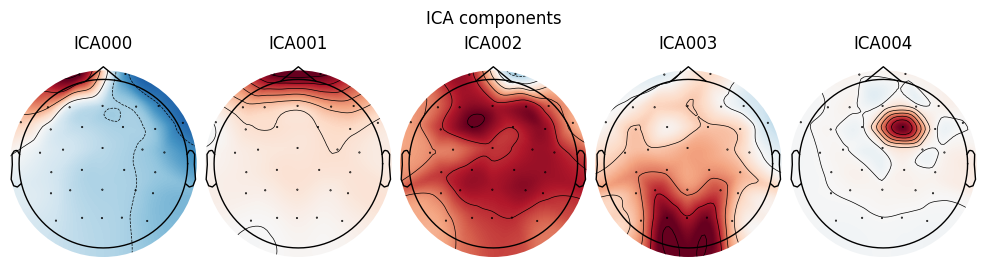

ICA applied to remove artifacts.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
EOG regression applied.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
ICA solution applied to obtain cleaned data.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 63 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 63.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 63.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 213 samples (1.664 s)

Muscle artifacts annotated with z-score threshold=5.


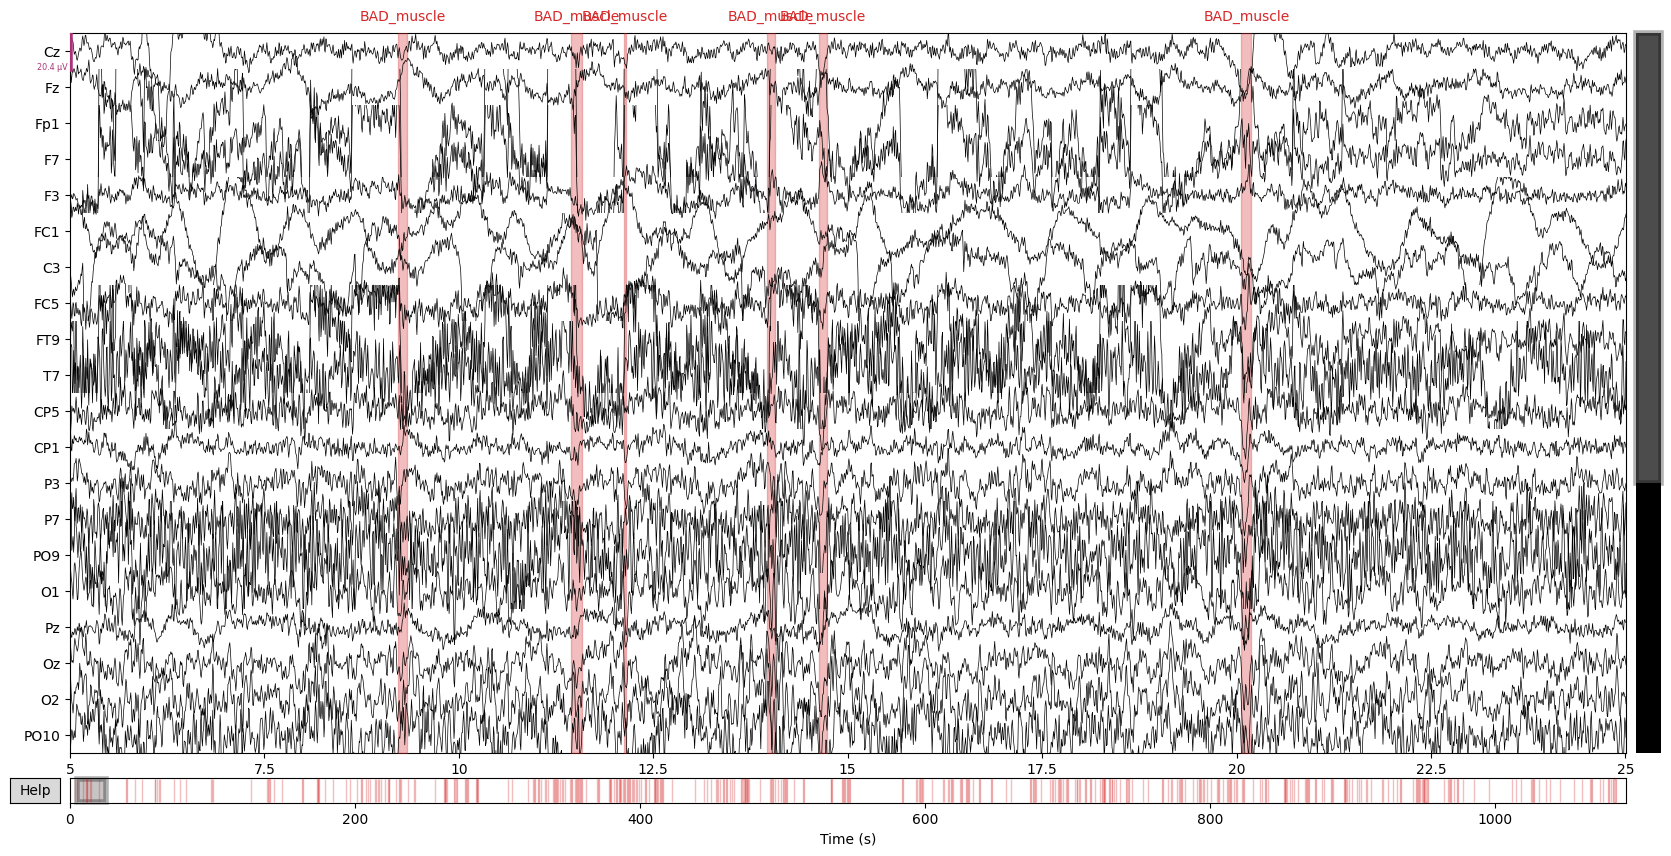

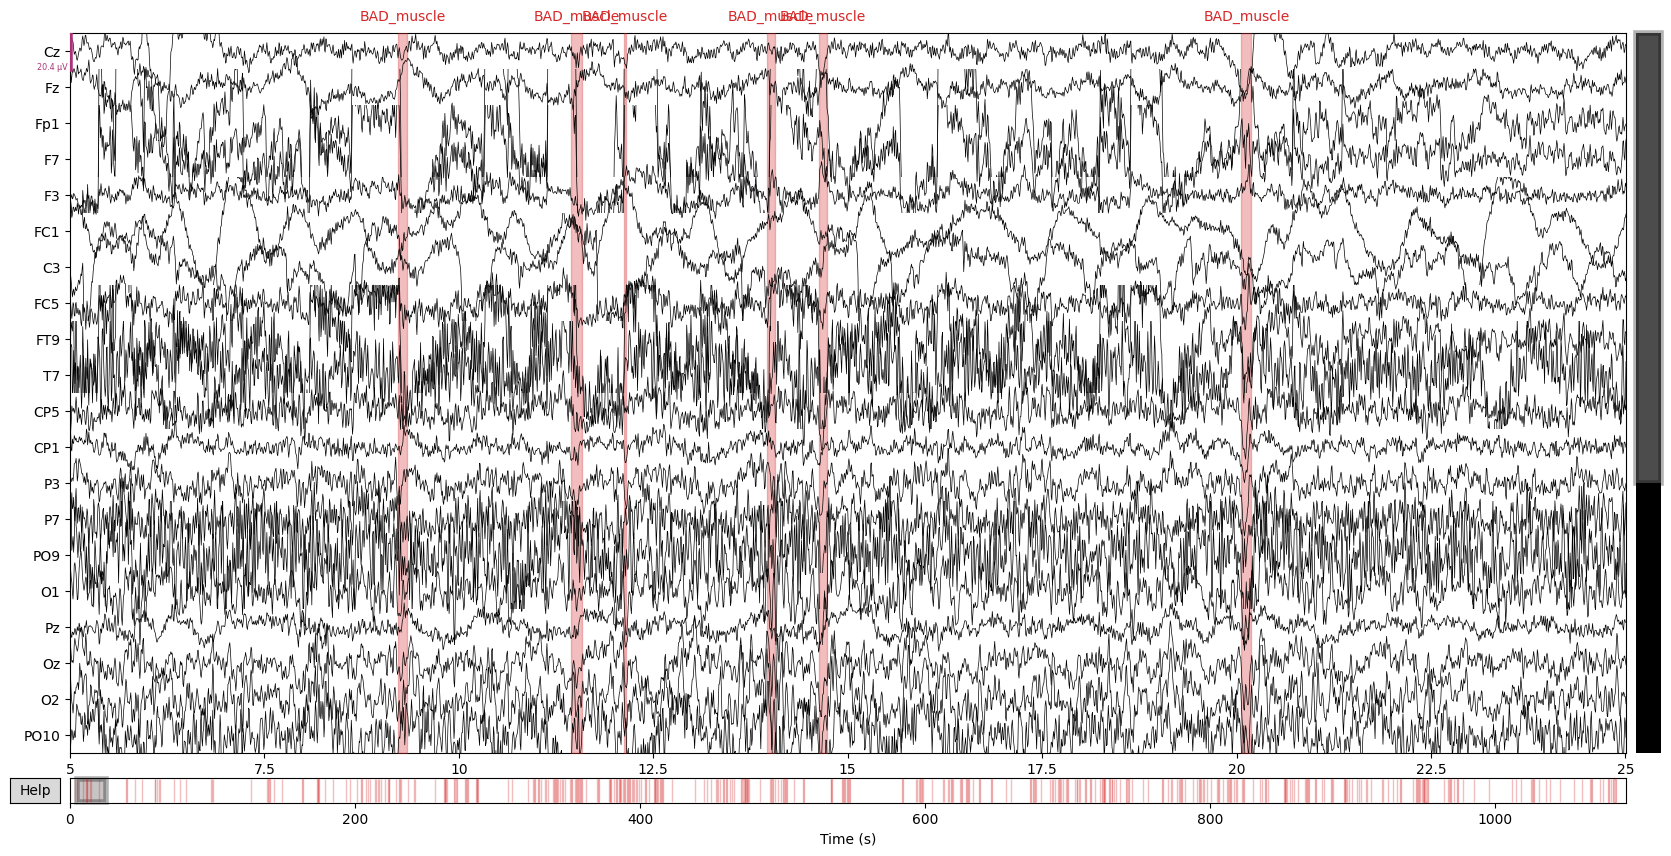

Plotted raw and cleaned EEG data with muscle artifact annotations.


In [19]:
import mne
from mne.preprocessing import ICA, EOGRegression, annotate_muscle_zscore
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
print(f"Raw data loaded. Number of channels: {len(raw.ch_names)}, Sampling frequency: {raw.info['sfreq']} Hz")

# Select EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
raw.pick_channels(eeg_channels)
print(f"Selected EEG channels: {eeg_channels}")

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')
print("Standard 10-20 montage applied.")

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)
raw.filter(l_freq=1, h_freq=40)
print("Applied average reference and band-pass filter (1 - 40 Hz).")

# Apply ICA to remove artifacts
ica = ICA(n_components=5, random_state=97, max_iter=800)
ica.fit(raw)
ica.plot_components()
print("ICA applied to remove artifacts.")

# EOG regression
eogRegression = EOGRegression(picks_artifact='Fp1')
eogRegression.fit(raw)
eogCorrected = eogRegression.apply(raw.copy())
print("EOG regression applied.")

# Apply ICA solution to clean data
raw_clean = ica.apply(raw.copy())
print("ICA solution applied to obtain cleaned data.")

# Annotate muscle artifacts using z-score
threshold_muscle = 5  # z-score
annot_muscle, scores_muscle = annotate_muscle_zscore(
    raw,
    ch_type="eeg",
    threshold=threshold_muscle,
    min_length_good=0.2,
    filter_freq=[1, 63],
)

# Convert segments to Annotations format
if annot_muscle is not None:
    annot_onset = annot_muscle.onset
    annot_duration = annot_muscle.duration
    annot_description = annot_muscle.description
    annot = mne.Annotations(annot_onset, annot_duration, annot_description, orig_time=raw.annotations.orig_time)
    raw.set_annotations(annot)
    raw_clean.set_annotations(annot)  # Apply the same annotations to cleaned data

    print(f"Muscle artifacts annotated with z-score threshold={threshold_muscle}.")

# Plot raw and cleaned data with annotations
# Example: Assuming raw and order are defined correctly
order = np.arange(0, len(raw.ch_names))  # Replace with your valid channel indices
raw.plot(start=5, duration=20, order=order, title='Raw EEG Data with Muscle Annotations', scalings='auto', show=True, block=True)
raw_clean.plot(start=5, duration=20, order=order, title='Cleaned EEG Data with Muscle Annotations', scalings='auto', show=True, block=True)

print("Plotted raw and cleaned EEG data with muscle artifact annotations.")


## Try and add z score graph later

Extracting EDF parameters from e:\WEBSITE\EDF_analysis\EDF+\Zacker\Zacker.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139775  =      0.000 ...  1091.992 secs...
Raw data loaded. Number of channels: 127, Sampling frequency: 128.0 Hz
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected EEG channels: ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
Standard 10-20 montage applied.
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 5 components
Fitting ICA took 1.2s.


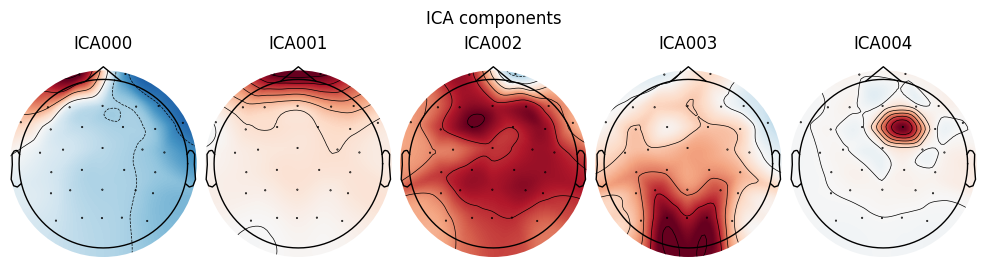

ICA applied to remove artifacts.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
EOG regression applied.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
ICA solution applied to obtain cleaned data.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 63 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 63.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 63.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 213 samples (1.664 s)

Muscle artifacts annotated with z-score threshold=5.


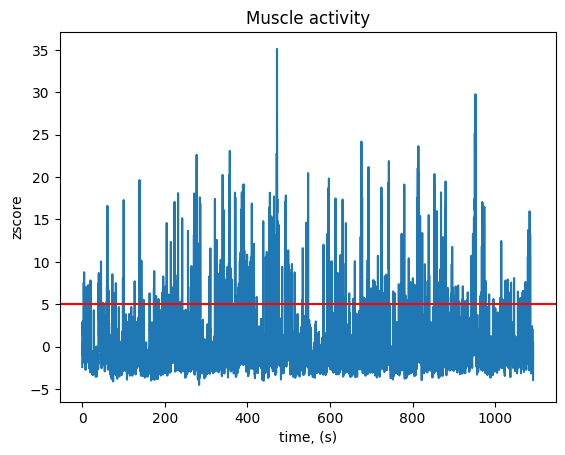

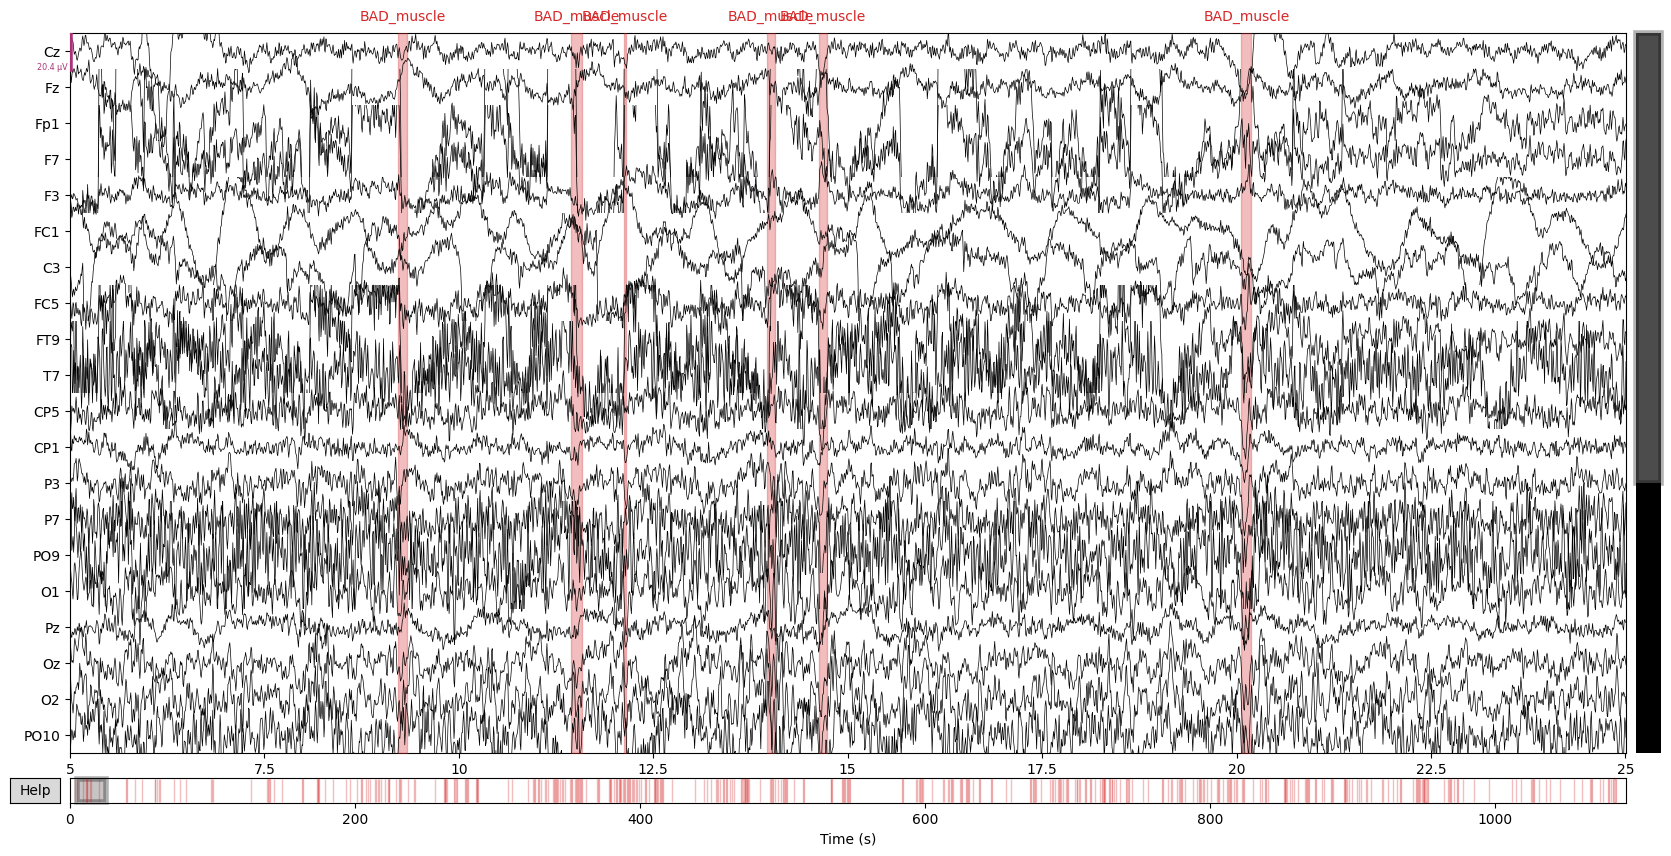

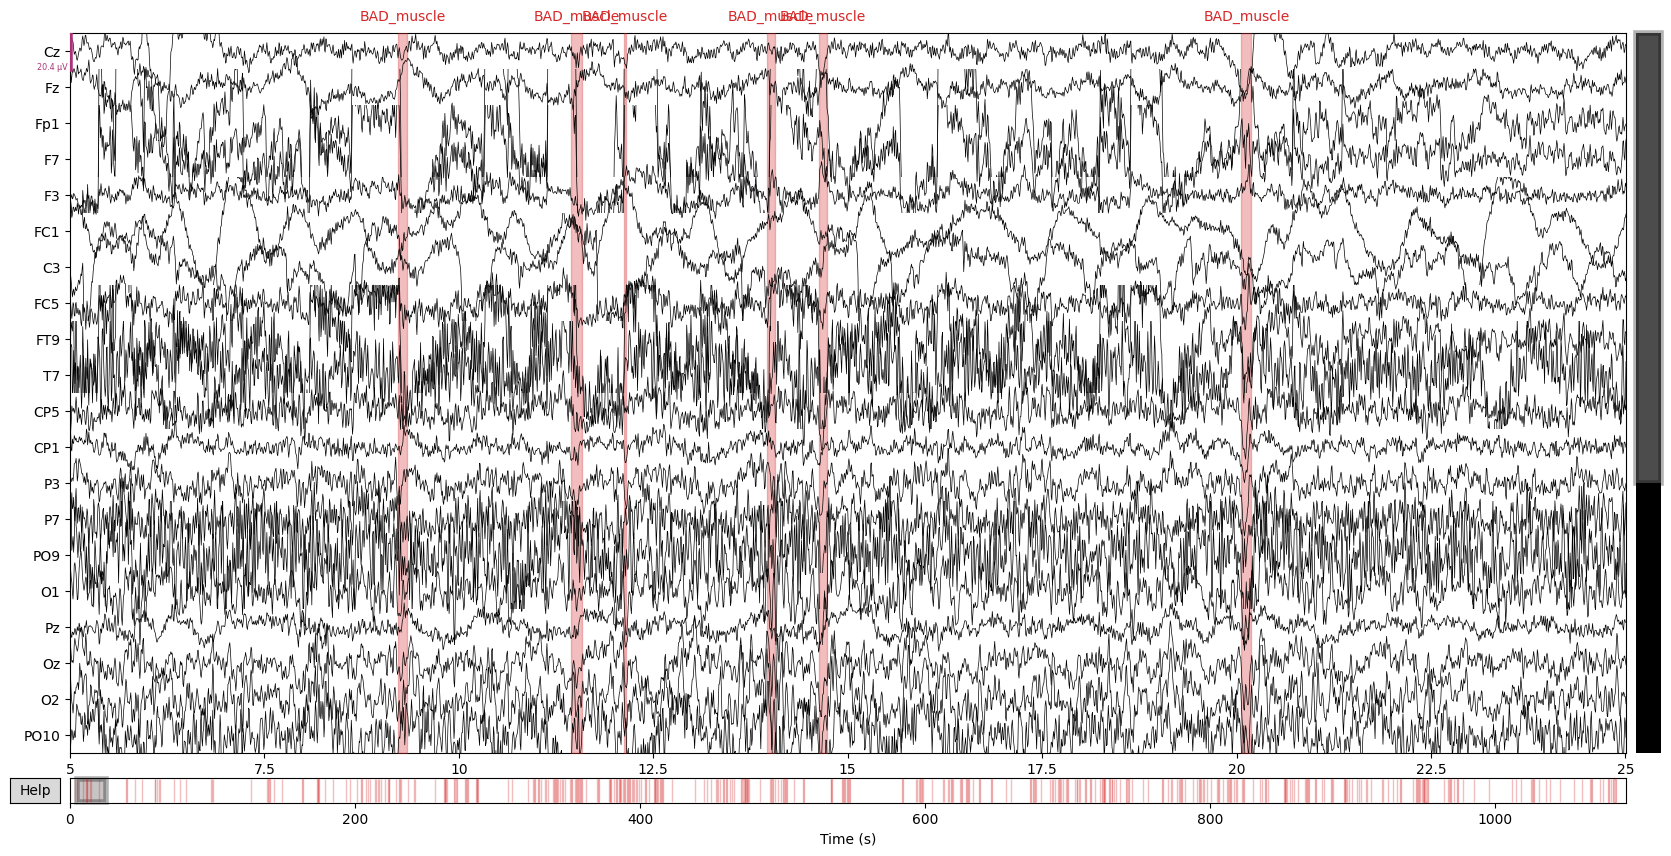

Plotted raw and cleaned EEG data with muscle artifact annotations.


In [20]:
import mne
from mne.preprocessing import ICA, EOGRegression, annotate_muscle_zscore
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf(r'EDF+\Zacker\Zacker.edf', preload=True, verbose=True, infer_types=True)
print(f"Raw data loaded. Number of channels: {len(raw.ch_names)}, Sampling frequency: {raw.info['sfreq']} Hz")

# Select EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
raw.pick_channels(eeg_channels)
print(f"Selected EEG channels: {eeg_channels}")

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')
print("Standard 10-20 montage applied.")

# Apply preprocessing steps
raw.set_eeg_reference('average', projection=True)
raw.filter(l_freq=1, h_freq=40)
print("Applied average reference and band-pass filter (1 - 40 Hz).")

# Apply ICA to remove artifacts
ica = ICA(n_components=5, random_state=97, max_iter=800)
ica.fit(raw)
ica.plot_components()
print("ICA applied to remove artifacts.")

# EOG regression
eogRegression = EOGRegression(picks_artifact='Fp1')
eogRegression.fit(raw)
eogCorrected = eogRegression.apply(raw.copy())
print("EOG regression applied.")

# Apply ICA solution to clean data
raw_clean = ica.apply(raw.copy())
print("ICA solution applied to obtain cleaned data.")

# Annotate muscle artifacts using z-score
threshold_muscle = 5  # z-score
annot_muscle, scores_muscle = annotate_muscle_zscore(
    raw,
    ch_type="eeg",
    threshold=threshold_muscle,
    min_length_good=0.2,
    filter_freq=[1, 63],
)

fig, ax = plt.subplots()
ax.plot(raw.times, scores_muscle)
ax.axhline(y=threshold_muscle, color="r")
ax.set(xlabel="time, (s)", ylabel="zscore", title="Muscle activity")

# Convert segments to Annotations format
if annot_muscle is not None:
    annot_onset = annot_muscle.onset
    annot_duration = annot_muscle.duration
    annot_description = annot_muscle.description
    annot = mne.Annotations(annot_onset, annot_duration, annot_description, orig_time=raw.annotations.orig_time)
    raw.set_annotations(annot)
    raw_clean.set_annotations(annot)  # Apply the same annotations to cleaned data

    print(f"Muscle artifacts annotated with z-score threshold={threshold_muscle}.")

# Plot raw and cleaned data with annotations
# Example: Assuming raw and order are defined correctly
order = np.arange(0, len(raw.ch_names))  # Replace with your valid channel indices
raw.plot(start=5, duration=20, order=order, title='Raw EEG Data with Muscle Annotations', scalings='auto', show=True, block=True)
raw_clean.plot(start=5, duration=20, order=order, title='Cleaned EEG Data with Muscle Annotations', scalings='auto', show=True, block=True)

print("Plotted raw and cleaned EEG data with muscle artifact annotations.")
